In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# **Why Feature extraction ?**

* Accuracy improvement
* overfitting risk reduction
* speed up training
* improved data visualization
* to increase explainability of model

# **Importing the required libraries**

In [2]:
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# **Importing the data**

In [3]:
data= pd.read_csv("../input/mushroom-classification/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# **Missing values**

<AxesSubplot:>

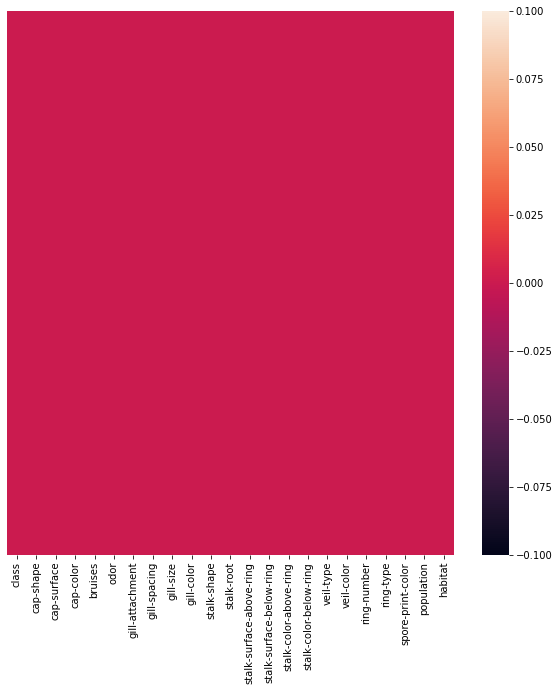

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels=False) # no null values in the dataset"

# **Seperating features (x) and Labels (y)**

In [5]:
x= data.drop(columns='class')
y= data['class']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# **Scaling and Encoding**

In [6]:
x= StandardScaler().fit_transform(x)
y= LabelEncoder().fit_transform(y)

**We will make function to split the data, train model and caluclate the score**

In [7]:
def forest_test(x,y):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=101)
    start= time.process_time()
    clf= RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
    print(time.process_time()-start)
    pred= clf.predict(x_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [8]:
forest_test(x,y)

2.7681376239999995
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# **model gives 100% accuracy if we use all the features**

# **Feature extraction**

# Principal Component Analysis (PCA)

# it is a most widely used linear dimensionality reduction technique. 
# In PCA we will input the oroiginal features and try to find the combination of features best summarise the original featuresa


# **1. we will reduce the dataset into only two features**

In [9]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
x_pca_2= pca.fit_transform(x)
pca_df= pd.DataFrame(data=x_pca_2, columns=["PC1", 'PC2'])
pca_df= pd.concat([pca_df, data['class']], axis=1)
pca_df['class']= LabelEncoder().fit_transform(pca_df['class'])
pca_df.head()

,PC1,PC2,class
0,-3.284708,1.020057,1
1,-3.969506,-0.856877,0
2,-4.958625,-0.211075,0
3,-3.469940,0.337891,1
4,-2.726579,0.889654,0


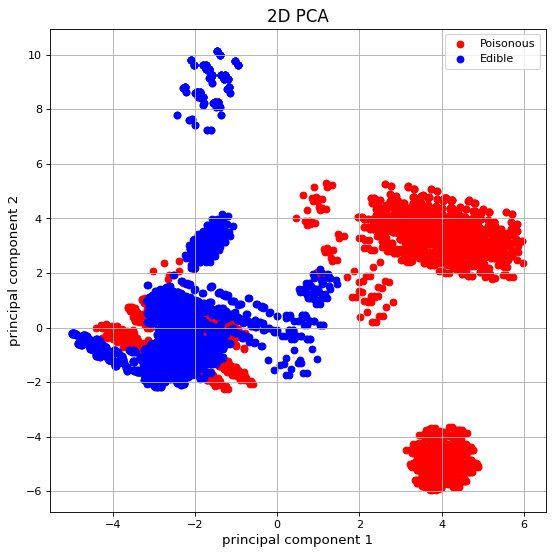

In [10]:
plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')

classes= [1,0]
colors= ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(pca_df.loc[pca_df['class'] == clas, 'PC1'],
               pca_df.loc[pca_df['class'] == clas, 'PC2'],
               c= color)

plt.xlabel('principal component 1', fontsize= 12)
plt.ylabel('principal component 2', fontsize= 12)
plt.title('2D PCA', fontsize= 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [11]:
forest_test(x_pca_2, y)

4.26587999
[[1240   34]
 [  93 1071]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.94      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



# **we got 95% score by using just 2 features**

# **3 Features PCA**

In [12]:
pca= PCA(n_components=3, svd_solver='full')
x_pca= pca.fit_transform(x)
print(pca.explained_variance_)

forest_test(x_pca, y)

[10.31484926  9.42671062  8.35720548]
4.295439611999999
[[1261   13]
 [  42 1122]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.96      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [13]:
import plotly.express as px
pca_df= pd.DataFrame(data=x_pca, columns=["PC1", 'PC2', 'PC3'])
df = pd.concat([pca_df, data['class']], axis=1)
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='class',labels= ['Poisonous', 'edible'])
fig.show()

# **We got 98% by using 3 features**

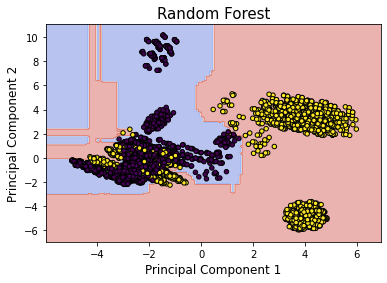

In [14]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(x_pca_2, y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

# **Independent Component Analyasis (ICA)**

**ICA is linear dimensionality reduction method which takes as input data a mixture of independent components and it try to correctly identify each of them.**

In [15]:
from sklearn.decomposition import FastICA

ica= FastICA(n_components=3)
x_ica= ica.fit_transform(x)
forest_test(x_ica, y)

4.280236464000005
[[1265    9]
 [  39 1125]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



# **Linear Discriminant Analysis (LDA)**

**LDA is supervised learning dimensionality reduction technique and machine learning classifier**
1. It maximize the distance between the mean of each class
2. minimize the spread within the class 

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(x,y).transform(x)
print('Original number of features:', x.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


In [17]:
forest_test(X_lda, y)

2.0156494679999994
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0033459089999965386
[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# **Locally Linear Embedding**

it is the dimensionalty reduction method based on manifold learning which is used in case of non lineaer features



In [19]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3, eigen_solver='dense')
x_lle= embedding.fit_transform(x)

forest_test(x_lle,y)

3.510713022999994
[[1274    0]
 [   3 1161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

It is non-linear dimenaionality reduction technique whic is typically used to visualize high dimensional datasets

In [20]:
from sklearn.manifold import TSNE
start= time.process_time()
tsne= TSNE(n_components=3, verbose= 1, perplexity=40, n_iter=300)
x_tsne= tsne.fit_transform(x)

print(time.process_time()-start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.001s...
[t-SNE] Computed neighbors for 8124 samples in 1.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.635254
[t-SNE] KL divergence after 300 iterations: 1.903454
136.81070098700002


In [21]:
forest_test(x_tsne, y)

3.742369101999998
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# **Autoencoders**

# Autoencoders are family of machine learning algorithms which can be used to reduce the dimensionality of the higher dimensional dataset  

In [22]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer= Input(shape=(x.shape[1],))
encoded= Dense(3, activation='relu')(input_layer)
decoded= Dense(x.shape[1], activation='softmax')(encoded)
autoencoder= Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x1, x2, y1, y2= train_test_split(x,x,test_size=0.3, random_state=101)

autoencoder.fit(x1, y1, 
               epochs= 100, 
               batch_size=300, 
               shuffle= True, 
               verbose= 30, 
               validation_data=(x2, y2))
encoder= Model(input_layer, encoded)
x_ae= encoder.predict(x)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [23]:
forest_test(x_ae, y)

3.721222802999989
[[1125  149]
 [ 150 1014]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1274
           1       0.87      0.87      0.87      1164

    accuracy                           0.88      2438
   macro avg       0.88      0.88      0.88      2438
weighted avg       0.88      0.88      0.88      2438

